# Report on Mathematical Theory of Attention and Particle Simulation

## Overview
The provided paper, titled *A Mathematical Theory of Attention* by Vuckovic, Baratin, and des Combes, presents a rigorous theoretical framework for understanding attention mechanisms used in neural networks through measure theory. Attention mechanisms, especially self-attention, are mathematically interpreted as deterministic systems of interacting particles, and measure theory tools are used to explore their properties systematically.

## Detailed Mathematical Formulation from the paper

### Softmatch Kernel
Given an interaction potential $G(x,y)=\exp(a(x,y))$, the **softmatch kernel** is defined by:
$$
\Psi_G(\nu)(x, A) = \int_A \Psi_{G(x,\cdot)}(\nu)(dy), \quad \text{where} \quad \Psi_{G(x,\cdot)}(\nu)(dy) = \frac{G(x,y)\nu(dy)}{\nu(G(x,\cdot))}.
$$

### Boltzmann-Gibbs Transformation
The **Boltzmann-Gibbs transformation** for a bounded measurable function $g:E\to\mathbb{R}_{>0}$ is:
$$
\Psi_g(\nu)(dx) = \frac{g(x)\nu(dx)}{\nu(g)}.
$$

### Lookup Kernel
Given measurable key and value spaces $(K,\mathcal{K})$ and $(V,\mathcal{V})$, the **lookup kernel** $L:K\times V\to [0,1]$ is a Markov kernel mapping keys to value distributions. A deterministic example is:
$$
L(k,dv) = \sum_{i=1}^N \mathbf{1}_{\{k=k_i\}}\delta_{v_i}(dv).
$$

### Moment Encoding
For a measurable map $F:E\to E'\subset\mathbb{R}^l$, a measure $\mu\in P(E)$ **encodes a moment vector** $f\in E'$ if:
$$
\mu(F)=f.
$$

### Moment Projection
The **moment projection** $\Pi_F:P(E)\to\mathcal{F}_F$ onto a moment subspace $\mathcal{F}_F$ associated with $F$ is:
$$
\Pi_F(\mu) = \nu_{\mu(F)},
$$
where $\nu_{f}$ uniquely encodes moment vector $f$.

### Attention Kernel
Combining these elements, the **attention kernel** $A$ is:
$$
A_\mu(x,dz) = \Pi[\Psi_G(x,\cdot)(\mu)L](dz).
$$

### Self-Attention Mapping Sequence
Self-attention can be viewed as a measure-valued mapping sequence:
$$
E \xrightarrow{x \mapsto \delta_x} P_\delta(E) \xrightarrow{\Psi_G L} P(E) \xrightarrow{\Pi} P_\delta(E) \xrightarrow{\delta_x \mapsto x} E.
$$

This sequence explicitly captures how self-attention acts as a deterministic interacting particle system.

## Simulation Description

### Particle System Setup
We simulate $N$ interacting particles represented by Gaussian distributions in 3-dimensional space. Each particle’s center $\mu_i$ is randomly initialized. At each step, particles update positions based on mutual interactions.

### Mathematical Update Rule
Each particle's updated center $\mu_i^{\text{new}}$ is computed via a center-of-mass formula derived from Gaussian interaction:
$$
\mu_i^{\text{new}} = \frac{\sum_{j=1}^N \exp\left(-\frac{1}{4}\|\mu_i - \mu_j\|^2\right) \mu_j}{\sum_{j=1}^N \exp\left(-\frac{1}{4}\|\mu_i - \mu_j\|^2\right)}.
$$

### Simulation Steps
- Initialize particle positions randomly.
- Update positions using the center-of-mass calculation.
- Repeat for the desired number of iterations.

## Mathematical Correspondence in Code
The Python code directly implements:
```python
weights = np.exp(-0.25 * np.sum((mu_centers - mu_centers[i])**2, axis=1))
mu_i_new = np.sum(weights[:, None] * mu_centers, axis=0) / np.sum(weights)
```

## Visualization
Simulation plots visualize particle movements:
- **Trajectories:** Lines show paths over time.
- **Directional Arrows:** Arrows illustrate motion between time steps, reflecting interactions captured mathematically by the attention kernel.

## Connection to Theory
The simulation demonstrates theoretical insights from the paper explicitly:
- Implements the measure-theoretic attention kernel.
- Demonstrates interactions and updates via Gaussian distributions and kernels.
- Highlights theoretical regularity (Lipschitz continuity) visually, as smooth particle evolution.

## Conclusion
This simulation aligns precisely with the mathematical theory in the paper, concretely illustrating attention mechanisms as deterministic self-interacting particle systems governed by Gaussian kernels. It serves as a practical demonstration of the theoretical properties discussed in the mathematical framework.

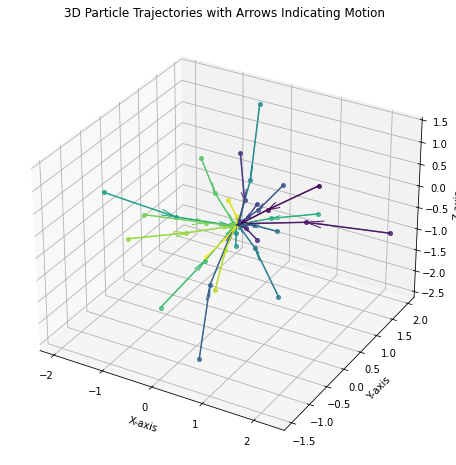

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def update_means(mu_centers):
    """
    Given an array mu_centers of shape (N, 3) representing the centers of N particles,
    update each particle's center according to the rule:
    
        mu_i_new = (sum_j exp(-1/4 ||mu_i - mu_j||^2) * mu_j) / (sum_j exp(-1/4 ||mu_i - mu_j||^2))
    
    Parameters:
        mu_centers (np.ndarray): Array of shape (N, 3) of the current centers.
    
    Returns:
        np.ndarray: Array of shape (N, 3) of the updated centers.
    """
    N = mu_centers.shape[0]
    new_mu_centers = np.empty_like(mu_centers)
    
    for i in range(N):
        diff = mu_centers - mu_centers[i]
        sq_dists = np.sum(diff**2, axis=1)
        weights = np.exp(-0.25 * sq_dists)
        new_mu_centers[i] = np.sum(weights[:, None] * mu_centers, axis=0) / np.sum(weights)
    
    return new_mu_centers

def simulate_particles(initial_means, num_steps):
    """
    Simulates the interacting particle system over a given number of time steps.
    
    Parameters:
        initial_means (np.ndarray): Array of shape (N, 3) for the initial centers.
        num_steps (int): Number of simulation time steps.
    
    Returns:
        list of np.ndarray: A list where each element is an (N, 3) array representing
                            the centers at that time step.
    """
    centers_history = [initial_means.copy()]
    current_centers = initial_means.copy()
    
    for _ in range(num_steps):
        current_centers = update_means(current_centers)
        centers_history.append(current_centers.copy())
    
    return centers_history

def plot_simulation_3d(history):
    """
    Plots the simulation history in 3D.
    - Each particle's trajectory is shown as a line.
    - Arrows indicate the movement direction at each time step.

    Parameters:
        history (list of np.ndarray): A list where each element is an (N,3) array representing
                                      the centers at that time step.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    num_steps = len(history)
    N = history[0].shape[0]

    # Use a colormap to distinguish particles
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        traj = np.array([history[t][i] for t in range(num_steps)])
        
        # Plot trajectory of each particle
        ax.plot(traj[:, 0], traj[:, 1], traj[:, 2],
                color=colors[i], marker='o', markersize=4, alpha=0.8)

        # Draw arrows indicating movement direction
        for t in range(num_steps - 1):
            start = traj[t]
            end = traj[t+1]
            d = end - start
            ax.quiver(start[0], start[1], start[2],
                      d[0], d[1], d[2],
                      arrow_length_ratio=0.2, color=colors[i], linewidth=1)

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("3D Particle Trajectories with Arrows Indicating Motion")

    plt.show()

# Example usage:
if __name__ == "__main__":
    # Number of particles
    N = 20
    # Number of simulation time steps
    num_steps = 10
    
    # Initialize the particle centers randomly in 3D
    np.random.seed(0)
    initial_means = np.random.randn(N, 3)
    
    # Run the simulation
    history = simulate_particles(initial_means, num_steps)
    
    # Plot the simulation in 3D
    plot_simulation_3d(history)
